In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./advertising_and_sales_clean.csv')
df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [5]:
X = df["radio"].values.reshape(-1,1)
y = df["sales"].values

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [7]:
predictions = reg.predict(X)
print(predictions)

[ 95491.17119147 117829.51038393 173423.38071499 ... 206147.61403088
 187204.93183873 174094.31771993]


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(y, predictions))
print("R2: ", r2_score(y, predictions))


MSE:  2123495983.3772736
R2:  0.7545316512195284


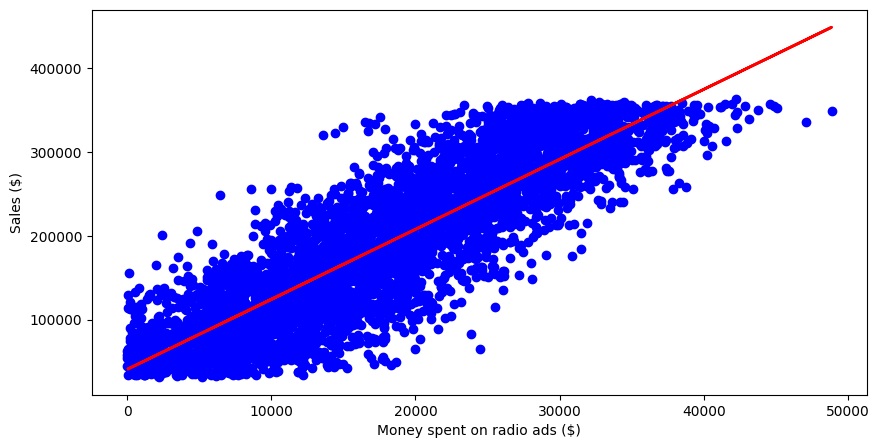

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, c='blue')
plt.plot(X, predictions, c='red', linewidth=2)
plt.xlabel("Money spent on radio ads ($)")
plt.ylabel("Sales ($)")
plt.show()

## multiple linear regression

In [10]:
df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [11]:
X = df.drop(columns=["sales", "influencer"], axis=1).values
y = df["sales"].values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
predictions = reg.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(y_test, predictions))
print("R2: ", r2_score(y_test, predictions))

MSE:  8669686.866907274
R2:  0.9990152104759368


### Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=5)
cv_scores = cross_val_score(reg, X, y, cv=kf, scoring="r2")

print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


In [18]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.percentile(cv_scores, [2.5, 97.5]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]
